In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:

import pandas as pd

file_path = '/content/drive/MyDrive/Topo/DBReto/CSV/Edenred Consolidado 2022.csv'
df = pd.read_csv(file_path)
df.head()

,Month,Id Grupo Región,Grupo de Región,Cliente,Factura,PO,GR,Id Región,Serie,No Economico,...,Id Conductor,Conductor,No Estación Pemex,Razón Social Afiliado,RFC,Número de Control,Folio,Observación,Respuesta,Estado
0,Jan,2,MCA2,02125-031,TCGE000002238239,4790886789,5003828540,1003,1FBAX2CM1KKA25124,231-VH,...,2212397.0,JUAN ROBERTO RUEDAS,11116,FERCHEGAS POZA RICA 11116,CGA010307N18,2248700,2238239,R,,Veracruz
1,Jan,2,MCA2,02125-031,TCGE000002238634,4790886891,5003828472,1002,1FTEX1CM5EKF13102,1716-VH,...,6324362.0,CARLOS OLAN MURILLO,00001,G500 INMOB EL CARMELO Y89,ICA100611PT1,2248699,2238634,R,,Tabasco
2,Jan,2,MCA2,02125-031,TCGE000002238239,4790886789,5003828540,1003,1FTEW1CB7MKD18909,639-VH,...,4234423.0,ERNESTO GUERRERO REYES,01045,ORSAN AUTOSERV CHONTALPA 1045,ESA930602UV1,2248700,2238239,R,,Tabasco
3,Jan,2,MCA2,02125-031,TCGE000002238618,4790886851,5003812149,1004,1FTFW1CDXMFA97465,687-VH,...,1730324.0,JUAN ANTONIO GOMEZ MARTINEZ,06428,SERVIFACIL PROMOS 2 6428,SFS920210NY3,2248701,2238618,R,,Veracruz
4,Jan,2,MCA2,02125-031,TCGE000002238634,4790886891,5003828472,1002,1FTEX1CM9EKE86700,1705-VH,...,6339386.0,MIGUEL ANGEL PEREZ,00001,BP LOS MONOS 0M767,EDG060824Q35,2248699,2238634,R,,Tabasco


In [98]:
#Dimensiones base de datos original
print(df.shape)


(12804, 53)


##Listado de variables

###Month:
Variable categórica, muestra el mes del registro.

###Id Grupo y Grupo de Región:
Variables categóricas, el id es 2 para MCA2 y DOWELL para Marine. Se puede eliminar una de ellas para simplificar el análisis.

###Cliente
Variable categórica. Muestra el numero de serie del cliente, en este caso puede tomar 2 valores

###Factura, PO, GR
Variable categórica, puede tener un número de serie o estar PENDIENTE.

###Id Región
Variable categórica, tiene ID: 1001-1004, OFS, WFS

###Serie
Variable categórica,

###No Económico
Variable categórica,

###Division BL, BL2 y SUB BL
Variables categóricas,

###CC
Variable categórica

###Identificador Vehiculo
Variable categórica, Id quizás interna del vehículo asociado a ese registro.

###Vehiculo y VIN
Variable categórica,número de identificación única de cada vehículo. En caso de existir un VIN, Vehiculo toma forma "Unidad {VIN}". Se recomienda concatenar Vehiculo y VIN para aquellos registros en donde no exista VIN particular.

###Placa
Variable categórica, es la placa del vehículo. Sería interesante que una placa esté asociada a más de un VIN, o viceversa.

###Num Tarjeta
Variable categórica, es el número de tarjeta de EDENRED que se utilizó para realizar la transacción.

###Num Serie
Número de serie del vehículo asociado al registro.


###Fecha Transaccion y Hora Transaccion
Variable categórica, se podría juntar ambas columnas en un solo timestamp.

###No Comprobante
Variable categórica, numero de comprobante para la transaccion. Existen incidencias de comprobantes en fechas diferentes, por lo que se puede transformar el numero de comprobante por una concatenacion de la fecha (DDMMAA) y el numero de serie.

###Id Mercancia y Mercancia
Variables categóricas, con id 101 para gasolina magna y id 103 para gasolina diesel. Posible eliminar el ID para evitar redundancia.

###Km Ant Transaccion
Variable numérica. Muestra el kilometraje del vehículo al inicio de la transacción.

###Km Transaccion
Variable numérica. Muestra el kilometraje de vehículo al término de la transacción.

###Recorrido
Variable numérica, es la diferencia entre el kilometraje antes y despues de la transacción para obtener la distancia recorrida.

###Importe neto, IVA, IVA %, IEPS, Importe Transaccion, Comisión, Subtotal
Variables numericas, representan los diferentes importes realizados. Siguen aproximadamente las siguientes relaciones:
- Importe neto + IVA = Importe Transaccion
- Importe Neto - IEPS *.16 ≃ IVA.
-Importe neto + Comisión = Subtotal

###Cantidad de mercancía
Variable numérica, cantidad de litros cargados al vehículo en esa transacción.

###KG CO2, Ton CO2, Arboles
Variables numéricas, las cantidades estimadas de kilogramos y toneladas de CO2 que se generará, basados en su rendimiento. Además, medida que relaciona a los árboles

###Precio Unitario
Variable numérica, precio unitario de un litro de gasolina al momento de la transacción.

###Rendimiento y Rendimiento Real
Variables numéricas, rendimiento teórico y real del vehículo, respectivamente. Se puede aproximar la cantidad de KG de CO2 generada a través del rendimiento real.

###ID Conductor, Conductor
Variables categóricas, número de identificación y nombres del conductor responsable de la unidad al momento de la transacción, respectivamente.

###No Estacion Pemex, Razón Social Afiliado, RFC
Variables categóricas, indican la información fiscal de la estación en la que se cargó gasolina.

###Numero de Control
Variable categórica, es una etiqueta proporcionada

###Folio
Variable categórica, indica el folio de la transacción


###Observación
Variable categórica, puede tomar 5 valores distintos, o estar vacío

###Respuesta
Puede tomar 2 valores, o estar vacío

###Estado
Estado de origen de la transacción.



In [99]:

def analyze_unique_columns(df):
  """
  Analyzes a Pandas DataFrame to identify unique and repeated columns per record.

  Args:
    df: The input Pandas DataFrame.

  Returns:
    A dictionary where keys are column names and values are the number of unique values
    in that column.
  """
  unique_counts = {}
  for col in df.columns:
    unique_counts[col] = df[col].nunique()
  return unique_counts

unique_column_info = analyze_unique_columns(df)
unique_column_info


{'Month': 12,
 'Id Grupo Región': 2,
 'Grupo de Región ': 2,
 'Cliente': 2,
 'Factura': 57,
 'PO': 67,
 'GR': 59,
 'Id Región': 7,
 'Serie': 346,
 'No Economico': 324,
 'Division': 5,
 'BL': 20,
 'BL 2 ': 20,
 'SUB BL': 26,
 'CC': 25,
 'Identificador Vehículo': 346,
 'Vehículo': 369,
 'VIN Number': 346,
 'Placa': 348,
 'Num Tarjeta': 345,
 'Num Serie': 400,
 'Fecha Transacción': 365,
 'Hora Transacción': 11187,
 'No Comprobante': 12707,
 'Id Mercancía': 2,
 'Mercancía': 2,
 'Km Ant Transacción': 11661,
 'Km Transacción': 11729,
 'Recorrido': 2256,
 'Importe Neto': 10004,
 'IVA': 8726,
 'IVA %': 1,
 'IEPS': 4474,
 'Importe Transacción': 9986,
 'Comision': 2634,
 'Subtotal': 10201,
 'Cantidad Mercancía': 5941,
 'KG C02': 6595,
 'TON C02': 170,
 'Arboles': 2484,
 'Precio Unitario': 335,
 'Rendimiento': 72,
 'Rendimiento Real': 2971,
 'Id Conductor': 772,
 'Conductor': 512,
 'No Estación Pemex': 347,
 'Razón Social Afiliado': 400,
 'RFC': 291,
 'Número de Control': 125,
 'Folio': 72,
 'Obs

In [100]:
# Encuentra el nombre de la columna con la mayor cantidad de valores únicos
max_unique_values = 0
column_name_with_max_unique = ""

for column_name, unique_count in unique_column_info.items():
  if unique_count > max_unique_values:
    max_unique_values = unique_count
    column_name_with_max_unique = column_name

print(f"La columna con mayor cantidad de valores únicos es '{column_name_with_max_unique}' con {max_unique_values} valores únicos.")
print(f"El total de registros es {df.shape[0]}")
print(f"La diferencia es de {df.shape[0]-max_unique_values}")

La columna con mayor cantidad de valores únicos es 'No Comprobante' con 12707 valores únicos.
El total de registros es 12804
La diferencia es de 97


In [101]:
dfClean = df.copy(deep = True)
dfClean.head()

,Month,Id Grupo Región,Grupo de Región,Cliente,Factura,PO,GR,Id Región,Serie,No Economico,...,Id Conductor,Conductor,No Estación Pemex,Razón Social Afiliado,RFC,Número de Control,Folio,Observación,Respuesta,Estado
0,Jan,2,MCA2,02125-031,TCGE000002238239,4790886789,5003828540,1003,1FBAX2CM1KKA25124,231-VH,...,2212397.0,JUAN ROBERTO RUEDAS,11116,FERCHEGAS POZA RICA 11116,CGA010307N18,2248700,2238239,R,,Veracruz
1,Jan,2,MCA2,02125-031,TCGE000002238634,4790886891,5003828472,1002,1FTEX1CM5EKF13102,1716-VH,...,6324362.0,CARLOS OLAN MURILLO,00001,G500 INMOB EL CARMELO Y89,ICA100611PT1,2248699,2238634,R,,Tabasco
2,Jan,2,MCA2,02125-031,TCGE000002238239,4790886789,5003828540,1003,1FTEW1CB7MKD18909,639-VH,...,4234423.0,ERNESTO GUERRERO REYES,01045,ORSAN AUTOSERV CHONTALPA 1045,ESA930602UV1,2248700,2238239,R,,Tabasco
3,Jan,2,MCA2,02125-031,TCGE000002238618,4790886851,5003812149,1004,1FTFW1CDXMFA97465,687-VH,...,1730324.0,JUAN ANTONIO GOMEZ MARTINEZ,06428,SERVIFACIL PROMOS 2 6428,SFS920210NY3,2248701,2238618,R,,Veracruz
4,Jan,2,MCA2,02125-031,TCGE000002238634,4790886891,5003828472,1002,1FTEX1CM9EKE86700,1705-VH,...,6339386.0,MIGUEL ANGEL PEREZ,00001,BP LOS MONOS 0M767,EDG060824Q35,2248699,2238634,R,,Tabasco


In [102]:
dfClean = dfClean.drop(columns=['Grupo de Región ', 'Vehículo','Mercancía','Conductor','Razón Social Afiliado','RFC'])


In [103]:
# Factura: 0 si 'PENDIENTE', 1 si otro valor
dfClean['Factura'] = dfClean['Factura'].apply(lambda x: 0 if str(x).upper() == 'PENDIENTE' else 1)

# PO: 0 si 'Pendiente', 1 si otro valor
dfClean['PO'] = dfClean['PO'].apply(lambda x: 0 if str(x).upper() == 'PENDIENTE' else 1)

# GR: 0 si 'Pendiente', 1 si otro valor
dfClean['GR'] = dfClean['GR'].apply(lambda x: 0 if str(x).upper() == 'PENDIENTE' else 1)
dfClean.head()

,Month,Id Grupo Región,Cliente,Factura,PO,GR,Id Región,Serie,No Economico,Division,...,Precio Unitario,Rendimiento,Rendimiento Real,Id Conductor,No Estación Pemex,Número de Control,Folio,Observación,Respuesta,Estado
0,Jan,2,02125-031,1,1,1,1003,1FBAX2CM1KKA25124,231-VH,RPF,...,$21.39,14.00,3.78,2212397.0,11116,2248700,2238239,R,,Veracruz
1,Jan,2,02125-031,1,1,1,1002,1FTEX1CM5EKF13102,1716-VH,PRS,...,$19.99,14.00,6.13,6324362.0,00001,2248699,2238634,R,,Tabasco
2,Jan,2,02125-031,1,1,1,1003,1FTEW1CB7MKD18909,639-VH,RPF,...,$20.19,7.00,2.33,4234423.0,01045,2248700,2238239,R,,Tabasco
3,Jan,2,02125-031,1,1,1,1004,1FTFW1CDXMFA97465,687-VH,WEC,...,$19.99,7.00,90.38,1730324.0,06428,2248701,2238618,R,,Veracruz
4,Jan,2,02125-031,1,1,1,1002,1FTEX1CM9EKE86700,1705-VH,PRS,...,$20.29,14.00,5.79,6339386.0,00001,2248699,2238634,R,,Tabasco


In [105]:
# Combine 'Fecha Transaccion' and 'Hora Transaccion' into a single timestamp column
dfClean['Timestamp'] = pd.to_datetime(dfClean['Fecha Transacción'] + ' ' + dfClean['Hora Transacción'], format='mixed')

# Drop the original date and time columns if needed
dfClean = dfClean.drop(columns=['Fecha Transacción', 'Hora Transacción'])

# Move the 'Timestamp' column to the beginning of the DataFrame
cols = list(dfClean.columns)
cols.insert(0, cols.pop(cols.index('Timestamp')))
dfClean = dfClean.loc[:, cols]

dfClean.head()


,Timestamp,Month,Id Grupo Región,Cliente,Factura,PO,GR,Id Región,Serie,No Economico,...,Precio Unitario,Rendimiento,Rendimiento Real,Id Conductor,No Estación Pemex,Número de Control,Folio,Observación,Respuesta,Estado
0,2022-01-01 10:32:33,Jan,2,02125-031,1,1,1,1003,1FBAX2CM1KKA25124,231-VH,...,$21.39,14.00,3.78,2212397.0,11116,2248700,2238239,R,,Veracruz
1,2022-01-01 13:05:14,Jan,2,02125-031,1,1,1,1002,1FTEX1CM5EKF13102,1716-VH,...,$19.99,14.00,6.13,6324362.0,00001,2248699,2238634,R,,Tabasco
2,2022-01-01 14:20:14,Jan,2,02125-031,1,1,1,1003,1FTEW1CB7MKD18909,639-VH,...,$20.19,7.00,2.33,4234423.0,01045,2248700,2238239,R,,Tabasco
3,2022-01-01 14:42:44,Jan,2,02125-031,1,1,1,1004,1FTFW1CDXMFA97465,687-VH,...,$19.99,7.00,90.38,1730324.0,06428,2248701,2238618,R,,Veracruz
4,2022-01-01 15:33:55,Jan,2,02125-031,1,1,1,1002,1FTEX1CM9EKE86700,1705-VH,...,$20.29,14.00,5.79,6339386.0,00001,2248699,2238634,R,,Tabasco


In [106]:
# prompt: Revisar cuantos valores duplicados existen por columna en el dataframe

# Calculate the number of duplicated rows in the DataFrame
duplicate_rows = dfClean[dfClean.duplicated()]
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicated rows: {num_duplicate_rows}")

# Calculate the number of duplicated values per column
for column in dfClean.columns:
  num_duplicates = dfClean[column].duplicated().sum()
  print(f"Column '{column}': {num_duplicates} duplicated values")


Number of duplicated rows: 0
Column 'Timestamp': 6 duplicated values
Column 'Month': 12792 duplicated values
Column 'Id Grupo Región': 12802 duplicated values
Column 'Cliente': 12802 duplicated values
Column 'Factura': 12802 duplicated values
Column 'PO': 12802 duplicated values
Column 'GR': 12802 duplicated values
Column 'Id Región': 12797 duplicated values
Column 'Serie': 12458 duplicated values
Column 'No Economico': 12480 duplicated values
Column 'Division': 12799 duplicated values
Column 'BL': 12784 duplicated values
Column 'BL 2 ': 12784 duplicated values
Column 'SUB BL': 12778 duplicated values
Column 'CC': 12779 duplicated values
Column 'Identificador Vehículo': 12458 duplicated values
Column 'VIN Number': 12458 duplicated values
Column 'Placa': 12456 duplicated values
Column 'Num Tarjeta': 12459 duplicated values
Column 'Num Serie': 12404 duplicated values
Column 'No Comprobante': 97 duplicated values
Column 'Id Mercancía': 12802 duplicated values
Column 'Km Ant Transacción': 

In [107]:
"""
Variables numericas:
Km Ant Transaccion, Km Transaccion, Recorrido, Importe neto, IVA, IVA %, IEPS, Importe Transaccion, Comisión, Subtotal, Cantidad de mercancía, KG CO2, Ton CO2, Arboles, Precio Unitario, Rendimiento, Rendimiento Real
"""
df.dtypes


,0
Month,object
Id Grupo Región,object
Grupo de Región,object
Cliente,object
Factura,object
PO,object
GR,object
Id Región,object
Serie,object
No Economico,object


In [108]:
numeric_cols = ['Km Ant Transacción', 'Km Transacción', 'Recorrido', 'Importe Neto', 'IVA', 'IVA %', 'IEPS', 'Importe Transacción',
                'Comision', 'Subtotal', 'Cantidad Mercancía', 'KG C02', 'TON C02', 'Arboles', 'Precio Unitario',
                'Rendimiento', 'Rendimiento Real']
#Para obtener el tipo de dato de cada columna numérica
for col in numeric_cols:
  print(f"Column '{col}': {dfClean[col].dtype}")


Column 'Km Ant Transacción': float64
Column 'Km Transacción': int64
Column 'Recorrido': float64
Column 'Importe Neto': object
Column 'IVA': object
Column 'IVA %': float64
Column 'IEPS': object
Column 'Importe Transacción': object
Column 'Comision': object
Column 'Subtotal': object
Column 'Cantidad Mercancía': object
Column 'KG C02': object
Column 'TON C02': float64
Column 'Arboles': float64
Column 'Precio Unitario': object
Column 'Rendimiento': object
Column 'Rendimiento Real': float64


In [109]:
# Iterate through the numeric columns and clean them
for col in numeric_cols:
    # Replace ',' with '' and '$' with ''
    dfClean[col] = dfClean[col].astype(str).str.replace(',', '', regex=False).str.replace('$', '', regex=False)

    # Convert the column to numeric, coercing errors to NaN
    dfClean[col] = pd.to_numeric(dfClean[col], errors='coerce')


In [110]:
# Convert non-numeric columns to strings
for col in dfClean.columns:
  if col not in numeric_cols:
    dfClean[col] = dfClean[col].astype(str)


In [111]:
dfClean.dtypes

,0
Timestamp,object
Month,object
Id Grupo Región,object
Cliente,object
Factura,object
PO,object
GR,object
Id Región,object
Serie,object
No Economico,object


In [112]:
# Check for empty values in each column
for col in dfClean.columns:
    empty_count = dfClean[col].isnull().sum()
    print(f"Column '{col}': {empty_count} empty values")

Column 'Timestamp': 0 empty values
Column 'Month': 0 empty values
Column 'Id Grupo Región': 0 empty values
Column 'Cliente': 0 empty values
Column 'Factura': 0 empty values
Column 'PO': 0 empty values
Column 'GR': 0 empty values
Column 'Id Región': 0 empty values
Column 'Serie': 0 empty values
Column 'No Economico': 0 empty values
Column 'Division': 0 empty values
Column 'BL': 0 empty values
Column 'BL 2 ': 0 empty values
Column 'SUB BL': 0 empty values
Column 'CC': 0 empty values
Column 'Identificador Vehículo': 0 empty values
Column 'VIN Number': 0 empty values
Column 'Placa': 0 empty values
Column 'Num Tarjeta': 0 empty values
Column 'Num Serie': 0 empty values
Column 'No Comprobante': 0 empty values
Column 'Id Mercancía': 0 empty values
Column 'Km Ant Transacción': 83 empty values
Column 'Km Transacción': 0 empty values
Column 'Recorrido': 83 empty values
Column 'Importe Neto': 0 empty values
Column 'IVA': 0 empty values
Column 'IVA %': 0 empty values
Column 'IEPS': 0 empty values


In [113]:
# prompt: Filtra los registros con al menos un valor faltante y guardalos en otro df auxiliar, en donde se genere una nueva columna a la izquierda del df que contenga una lista con los nombres de las columnas que tengan valor faltante en ese registro

# Create a new DataFrame to store rows with missing values
df_missing = dfClean[dfClean.isnull().any(axis=1)].copy()

# Create a list of column names with missing values for each row
missing_cols = []
for index, row in df_missing.iterrows():
  cols = row.index[row.isnull()]
  missing_cols.append(list(cols))

# Insert the new column 'Missing Columns' at the beginning of the DataFrame
df_missing.insert(0, 'Missing Columns', missing_cols)

# Now df_missing contains the rows with at least one missing value and a new column
# indicating which columns had the missing value


##Valores Faltantes

In [114]:

from collections import Counter

# Assuming df_missing is already created as in your provided code

missing_column_lists = df_missing['Missing Columns'].tolist()

# Count the occurrences of each unique list
unique_missing_column_lists = Counter(tuple(sorted(lst)) for lst in missing_column_lists)

# Print the unique lists and their counts
for unique_list, count in unique_missing_column_lists.items():
    print(f"List: {list(unique_list)}, Count: {count}")


List: ['Km Ant Transacción', 'Recorrido'], Count: 83
List: ['Arboles', 'KG C02', 'TON C02'], Count: 82
List: ['KG C02'], Count: 226


#Medias Estadisticas

##Variables Cuantitativas

In [115]:
# Measures of Central Tendency
means = dfClean[numeric_cols].mean()
medians = dfClean[numeric_cols].median()
modes = dfClean[numeric_cols].mode().iloc[0]  # Get the first mode if multiple exist

# Measures of Dispersion
ranges = dfClean[numeric_cols].max() - dfClean[numeric_cols].min()
variances = dfClean[numeric_cols].var()
std_devs = dfClean[numeric_cols].std()

# Display the results
print("Means:\n", means)
print("\nMedians:\n", medians)
print("\nModes:\n", modes)
print("\nRanges:\n", ranges)
print("\nVariances:\n", variances)
print("\nStandard Deviations:\n", std_devs)

Means:
 Km Ant Transacción     131342.869900
Km Transacción         132785.517885
Recorrido                1975.802767
Importe Neto             1694.452390
IVA                       264.801065
IVA %                      16.000000
IEPS                       39.853656
Importe Transacción      1959.253351
Comision                   16.251646
Subtotal                 1730.280851
Cantidad Mercancía         89.241054
KG C02                    210.098463
TON C02                     0.206424
Arboles                    13.757768
Precio Unitario            21.429852
Rendimiento                13.170876
Rendimiento Real            4.853221
dtype: float64

Medians:
 Km Ant Transacción     94960.000
Km Transacción         95033.000
Recorrido                284.000
Importe Neto            1158.795
IVA                      180.600
IVA %                     16.000
IEPS                      30.320
Importe Transacción     1339.480
Comision                  11.145
Subtotal                1187.005
Cantida

In [120]:
# Calcula los cuartiles para cada columna numérica
quartiles = dfClean[numeric_cols].quantile([0.25, 0.5, 0.75])

# Muestra los resultados
print(quartiles)

      Km Ant Transacción  Km Transacción  Recorrido  Importe Neto       IVA  \
0.25             46607.0         46386.0      161.0       820.725  127.8375   
0.50             94960.0         95033.0      284.0      1158.795  180.6000   
0.75            131512.0        131748.5      430.0      1506.660  234.9100   

      IVA %     IEPS  Importe Transacción  Comision   Subtotal  \
0.25   16.0  21.5575             948.4200     7.920   843.5325   
0.50   16.0  30.3200            1339.4800    11.145  1187.0050   
0.75   16.0  38.7800            1741.5325    14.590  1553.5600   

      Cantidad Mercancía   KG C02  TON C02  Arboles  Precio Unitario  \
0.25               45.00  104.535     0.10    6.780            20.79   
0.50               64.00  149.980     0.15    9.835            21.39   
0.75               81.54  193.680     0.19   12.910            22.19   

      Rendimiento  Rendimiento Real  
0.25         14.0              2.54  
0.50         14.0              5.21  
0.75         14

##Variables Categóricas

In [116]:
for col in dfClean.columns:
  if col not in numeric_cols:
    print(f"\nFrequency Distribution for {col}:\n", dfClean[col].value_counts())


Frequency Distribution for Timestamp:
 Timestamp
2022-08-04 14:07:26    2
2022-04-04 13:12:38    2
2022-12-21 07:16:46    2
2022-04-06 10:58:38    2
2022-02-09 13:46:58    2
                      ..
2022-05-23 10:02:51    1
2022-05-23 10:05:57    1
2022-05-23 10:13:38    1
2022-05-23 10:28:08    1
2022-05-22 16:22:02    1
Name: count, Length: 12798, dtype: int64

Frequency Distribution for Month:
 Month
Aug    1372
Sep    1256
Nov    1198
Dec    1121
Jul    1115
Jun    1093
Oct    1082
May     982
Jan     922
Mar     918
Abr     906
Feb     839
Name: count, dtype: int64

Frequency Distribution for Id Grupo Región:
 Id Grupo Región
2         12725
DOWELL       79
Name: count, dtype: int64

Frequency Distribution for Cliente:
 Cliente
02125-031    12725
02125-021       79
Name: count, dtype: int64

Frequency Distribution for Factura:
 Factura
1    11612
0     1192
Name: count, dtype: int64

Frequency Distribution for PO:
 PO
1    11683
0     1121
Name: count, dtype: int64

Frequency Dis

##Diagramas

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_incidence_density(df, column_name, threshold_percentage, bins=None):
  """
  Generates a histogram or density plot of incidences for a specified column,
  categorizing infrequent values as "Others" and handling float values.

  Args:
    df: The input Pandas DataFrame.
    column_name: The name of the column to analyze.
    threshold_percentage: The threshold (1-1000, representing 0.1%-100%) for
                         categorizing infrequent values.
    bins: The number of bins to use for the histogram. If None, it is
          automatically determined.
  """

  # Calculate the threshold for "Others"
  threshold = (threshold_percentage / 1000) * len(df)

  # Count the occurrences of each value in the column
  value_counts = df[column_name].value_counts()

  # Identify values below the threshold and group them as "Others"
  others = value_counts[value_counts < threshold].index
  df_plot = df.copy()

  # Convert the column to string only if it is of object type
  if pd.api.types.is_object_dtype(df_plot[column_name]):
      df_plot.loc[df_plot[column_name].isin(others), column_name] = "Others"
  else:  # Handle numeric columns (float, int)
      # Replace infrequent numeric values with a placeholder (e.g., -999)
      # You might want to choose a more appropriate placeholder for your data
      df_plot.loc[df_plot[column_name].isin(others), column_name] = -999

  # Create the plot
  plt.figure(figsize=(8, 6))

  # Determine if the column is numeric and has float values
  is_numeric_float = np.issubdtype(df[column_name].dtype, np.number) and df[column_name].dtype != np.int64

  if is_numeric_float:  # Handle float values using histogram with bins
    sns.histplot(x=column_name, data=df_plot, bins=bins, kde=True)
    plt.title(f'Histograma de Incidencias para {column_name}')

  else: # Handle other data types (categorical, int)
    if len(df_plot[column_name].unique()) <= 10:
      sns.countplot(x=column_name, data=df_plot)
      plt.title(f'Histograma de Incidencias para {column_name}')
    else:
      sns.histplot(x=column_name, data=df_plot, kde=True)
      plt.title(f'Densidad de Incidencias para {column_name}')

  plt.xticks(rotation=45, ha='right')
  plt.xlabel(column_name)
  plt.ylabel('Frecuencia')
  plt.tight_layout()
  plt.show()

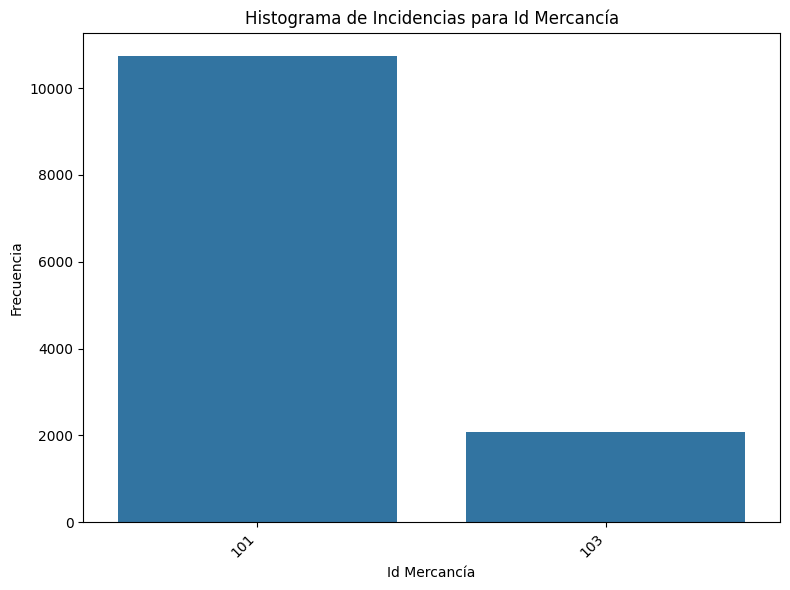

In [163]:
# Ejemplo con número de bins especificado
plot_incidence_density(dfClean, 'Id Mercancía', 6, bins=50)



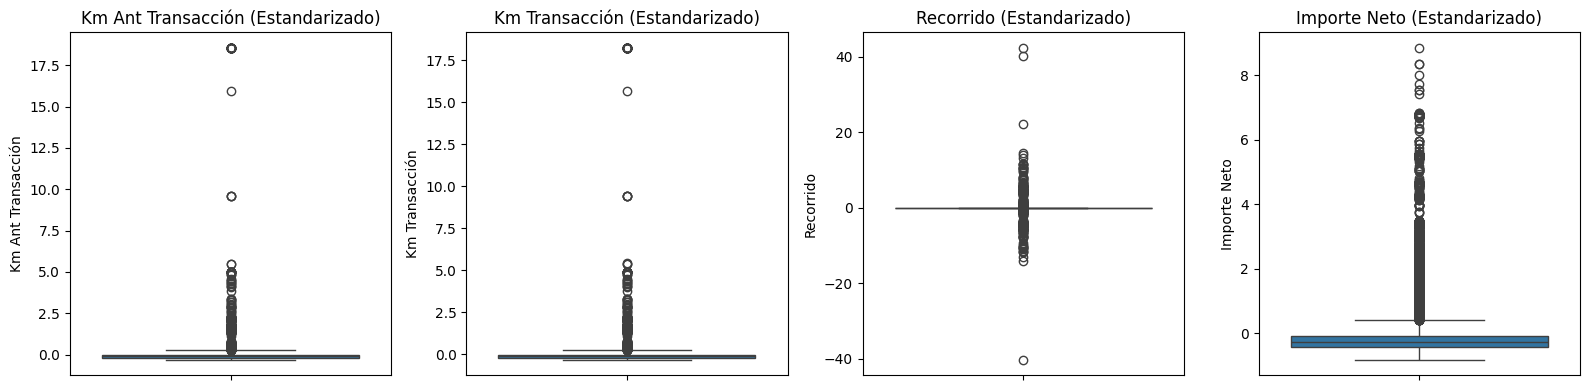

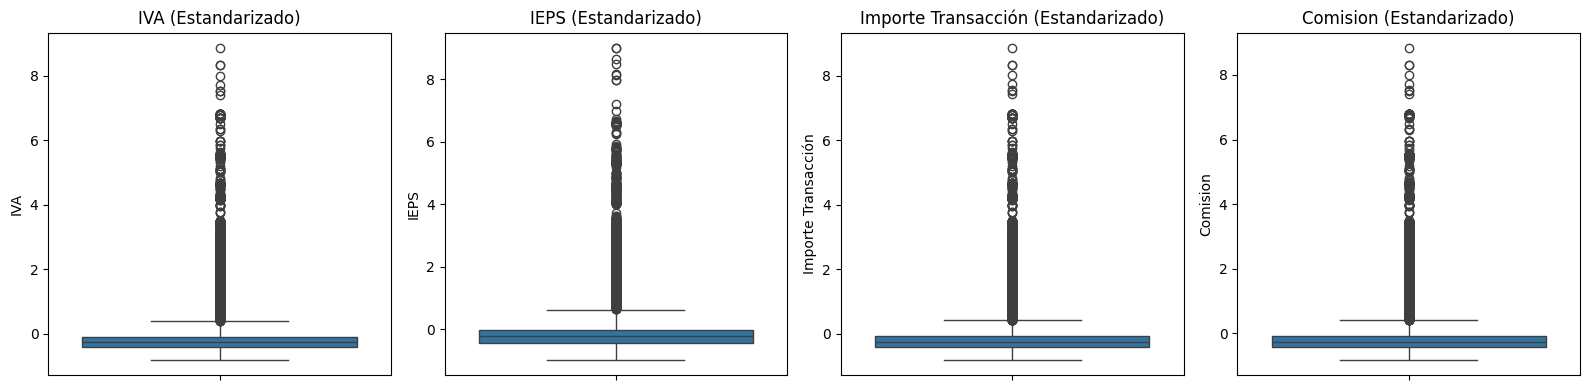

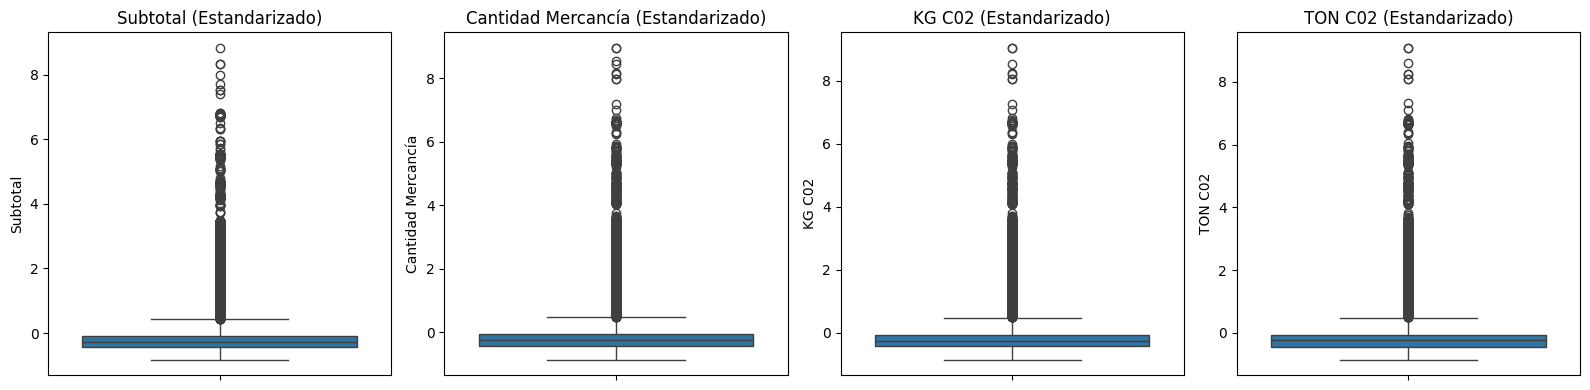

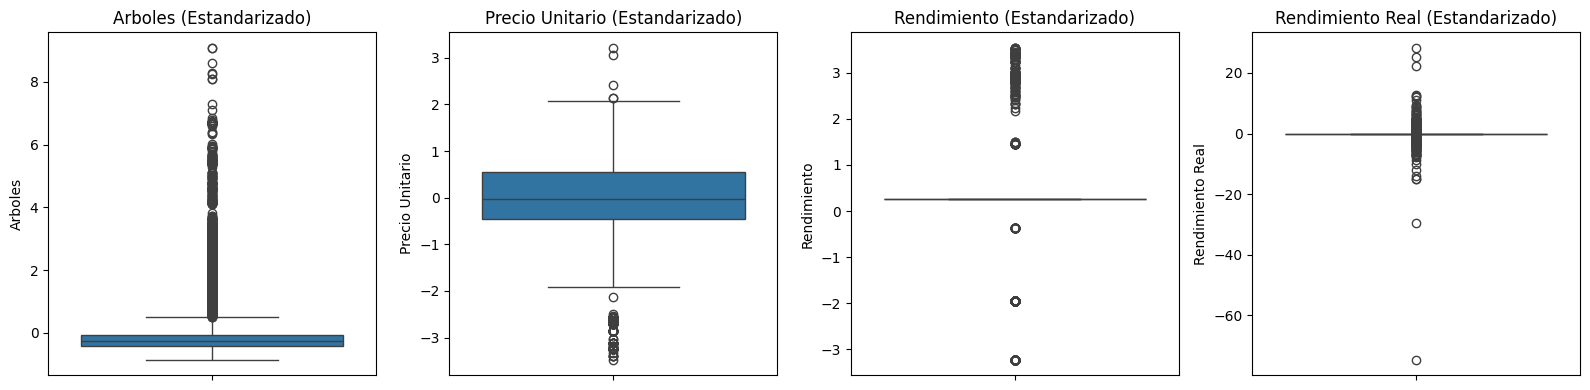

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


numeric_cols = ['Km Ant Transacción', 'Km Transacción', 'Recorrido', 'Importe Neto', 'IVA',
                'IEPS', 'Importe Transacción', 'Comision', 'Subtotal',
                'Cantidad Mercancía', 'KG C02', 'TON C02', 'Arboles', 'Precio Unitario',
                'Rendimiento', 'Rendimiento Real']

# Crea una copia del DataFrame original para evitar modificar los datos originales
scaled_df = dfClean.copy()

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma los datos numéricos
scaled_df[numeric_cols] = scaler.fit_transform(scaled_df[numeric_cols])

# Número de columnas por gráfico
cols_per_plot = 4

# Número de gráficos necesarios
num_plots = (len(numeric_cols) + cols_per_plot - 1) // cols_per_plot

# Itera sobre los gráficos
for i in range(num_plots):
    # Define las columnas para este gráfico
    start_index = i * cols_per_plot
    end_index = min(start_index + cols_per_plot, len(numeric_cols))
    cols_for_plot = numeric_cols[start_index:end_index]

    # Crea el gráfico
    fig, axes = plt.subplots(1, len(cols_for_plot), figsize=(16, 4))

    # Itera sobre las columnas de este gráfico
    for j, col in enumerate(cols_for_plot):
        sns.boxplot(y=scaled_df[col], ax=axes[j])
        axes[j].set_title(col+" (Estandarizado)")

    plt.tight_layout()
    plt.show()


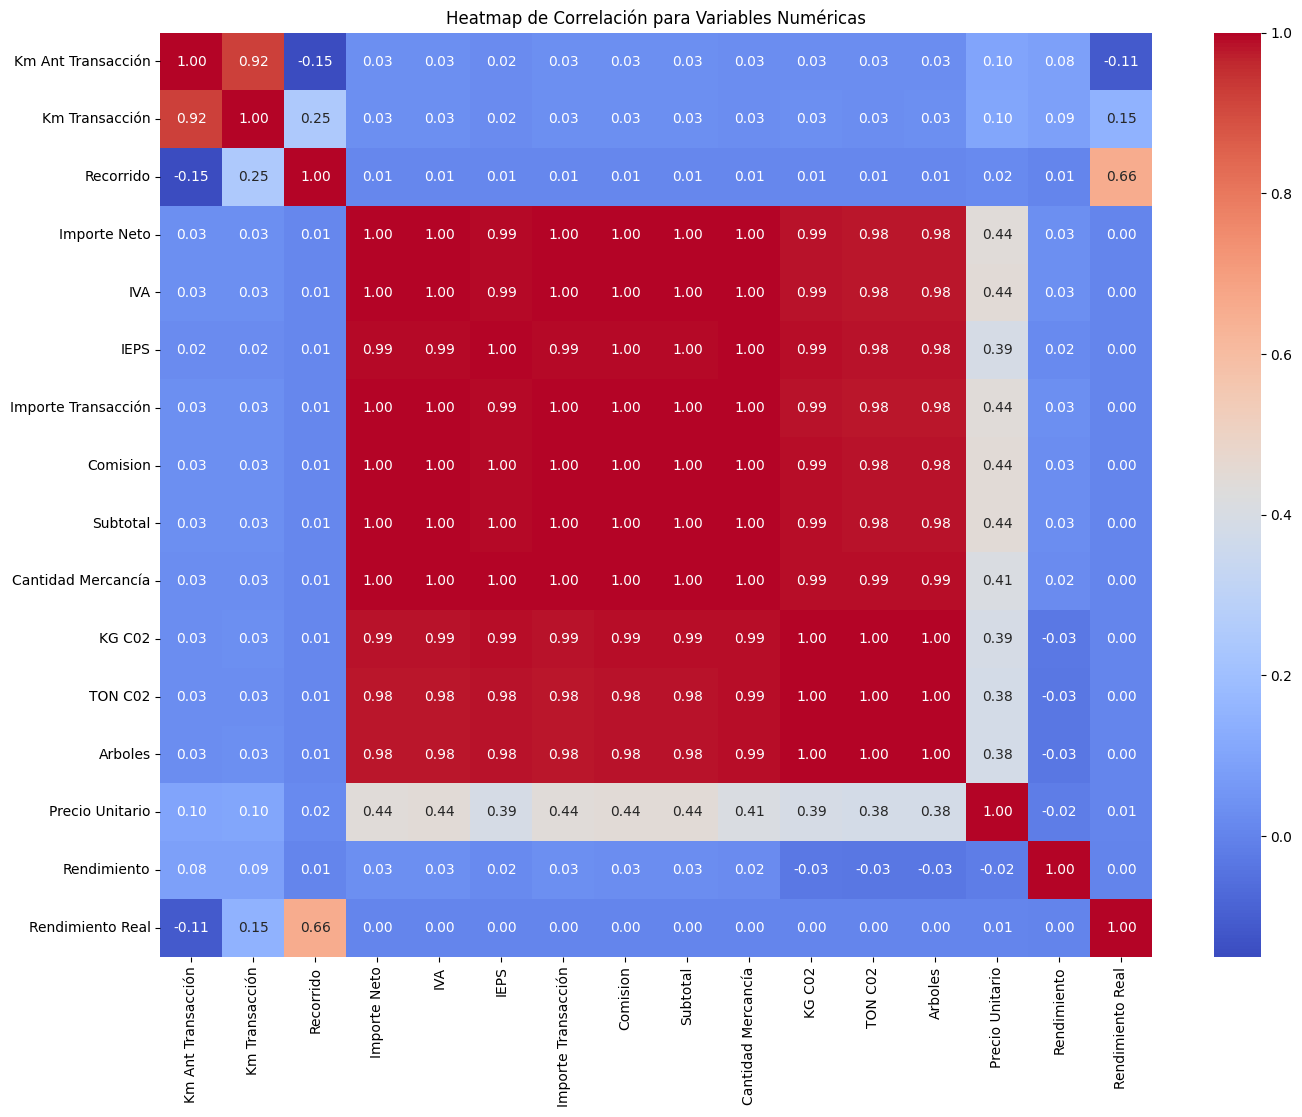

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define las columnas numéricas
numeric_cols = ['Km Ant Transacción', 'Km Transacción', 'Recorrido', 'Importe Neto', 'IVA',
                'IEPS', 'Importe Transacción', 'Comision', 'Subtotal',
                'Cantidad Mercancía', 'KG C02', 'TON C02', 'Arboles', 'Precio Unitario',
                'Rendimiento', 'Rendimiento Real']


# Calcula la matriz de correlación
correlation_matrix = dfClean[numeric_cols].corr()

# Crea el Heatmap
plt.figure(figsize=(16, 12))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación para Variables Numéricas')
plt.show()